In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
experiment = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv')
experiment.info()
experiment['timestamp'] = pd.DatetimeIndex(experiment['timestamp']).date
experiment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21,control,old_page,0
1,804228,2017-01-12,control,old_page,0
2,661590,2017-01-11,treatment,new_page,0
3,853541,2017-01-08,treatment,new_page,0
4,864975,2017-01-21,control,old_page,1


In [40]:
#Check for adequate sample sizes
experiment_test = experiment[experiment['group'] == 'treatment']
experiment_control = experiment[experiment['group'] == 'control']

print('The size of the test sample is: {} '.format(experiment_test.shape[0]))
print('The size of the control sample is: {} '.format(experiment_control.shape[0]))
print(experiment['converted'].mean())

print('test sucess rate: ', experiment_test[experiment_test.converted == 1].shape[0]/experiment_test.shape[0])
print('control success rate: ', experiment_control[experiment_control.converted == 1].shape[0]/experiment_test.shape[0])

The size of the test sample is: 145311 
The size of the control sample is: 145274 
0.11959667567149027
test sucess rate:  0.11880724790277405
control success rate:  0.12035565098306392


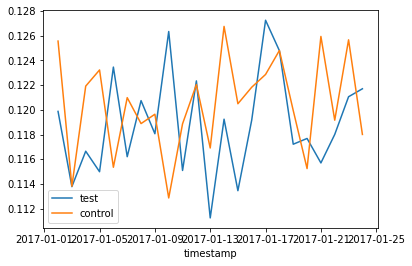

In [27]:
fig = experiment[experiment.group == 'treatment'][['timestamp', 'converted']].groupby('timestamp').mean().plot()
experiment[experiment.group == 'control'][['timestamp', 'converted']].groupby('timestamp').mean().plot(ax = fig)
plt.legend(['test', 'control'])
plt.show()

In [29]:
#Formally test for a significant differnce
stats.ttest_ind(experiment_control['converted'], experiment_test['converted'])

Ttest_indResult(statistic=1.3116069027036805, pvalue=0.18965383906859376)